# Radial Basis Functions


Radial Basis Functions (RBF) are used to approximate a function $f(\boldsymbol{x})$ given $f_i$ function values at $N$ discrete points $\boldsymbol{x}$. The approximation may be as a result of an interpolation or regression of the known function values in any number of input dimensions. The general surrogate model is constructed by treating the observed function values as if generated from the model

\begin{equation}
f_i = \sum_{k=1}^M \beta_k \phi \left( \boldsymbol{x}_i ,\boldsymbol{x}_k\right) + p \left( \boldsymbol{x}_i \right) + \epsilon_i\tag{1}
\end{equation}

with $\beta_k$ the weighting coefficient of the $k^{th}$ basis function evaluation using the kernel or centre $\boldsymbol{x}_k$. The total basis function contribution results out of a summation of the contributions made by each basis function centre. The model may also have an underlying definition with $ p ( \boldsymbol{x}_i )$  a polynomial and uncertainty captured by a normally distributed independent error term . In the case of exact interpolation, the error term is zero.
The basis basis functions $\phi (\bullet)$ may take numerous functional forms.  In this notebook the  centre contribution is determined as a result of a Euclidean distance measure $r_{k} = || \boldsymbol{x} - \boldsymbol{x}_k || $, so that
\begin{equation}
 \phi \left( \boldsymbol{x}_i ,\boldsymbol{x}_k\right) = \phi (r_k)\tag{2}
\end{equation}

Popular functional forms here illustrated include:

A second order poly-harmonic spline, commonly referred to as the Thin plate spline (TPS):
\begin{equation}
\phi (r) = r^2 \ln (r)\tag{3}
\end{equation}

A Gaussian function
\begin{equation}
\phi(r) = \exp [ -  (r/ \varepsilon)^2 ]\tag{4}
\end{equation}
with $\epsilon$ a tunable parameter associated with the radius of influence of a given or all basis function centres. 

The Inverse Multi-quadric function
\begin{equation}
\phi (r) = 1 / \sqrt{ 1 +  (r/\varepsilon)^2}\tag{5}
\end{equation}

A $C^2$ continuous compact support function 
\begin{equation}
\phi (r) = \begin{cases}  (1- r/\varepsilon)^4 (4r/\varepsilon +1) & 0\leq r/\varepsilon \leq 1 \\ 0  & r/\varepsilon>1\end{cases}\tag{6}
\end{equation}
from here on simply called CPC2.


In [2]:
# Import necessary modules
import numpy as np

# Define some basis functions (d is the radius of influence $\epsilon$):
tps   = lambda r,d=1  :  0 if r==0 else r**2*np.log(r)
gauss = lambda r,d=1  :                 np.exp(-(r/d)**2)
imq   = lambda r,d=1  :                 1/np.sqrt(1+(r/d)**2)
cpc2  = lambda r,d=1  :  0 if r>d  else (1-r/d)**4*(4*r/d+1)

# If using the gaussian basis function
phi = gauss


$ $

$ $

$ $

## Interpolation

As an illustrative example of how RBF interpolation is achieved, a one-dimensional test function 

\begin{equation}
f(x) = \sin(8x) + 0.66\cos(18x) + 3-2x; \quad 0 \leq x \leq 1\tag{7}
\end{equation}

is approximated using a vector of sample locations $x_i \in \{ 0.0, 0.05, 0.15, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9, 1.0 \}$ resulting in the list of function values $f_i$.
	

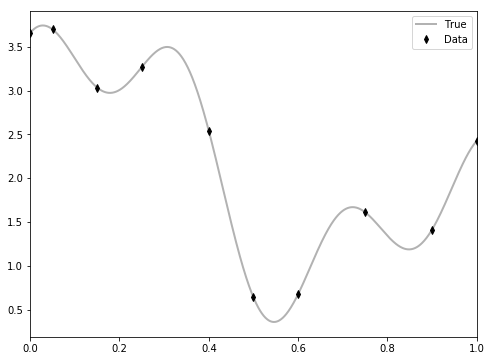

In [3]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt


# The test function
f = lambda x: np.sin(8*x) + 0.66*np.cos(18*x) + 3 - 2*x
# full resolution 
x = np.linspace(0,1,1001)
fx = f(x)
# sample locations
x_i = np.array([0.,0.05,0.15,0.25,0.4,0.5,0.6,0.75,0.9,1.0])
f_i = f(x_i)

# plot the true function and the sample locations
plt.figure(1,(8,6))
plt.plot(x  ,fx ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_i,f_i,'kd',ms=5,label='Data');
plt.xlim([0,1])
plt.legend();


The test function is now approximated using interpolation with a second order polynomial and Gaussian functional form, effectively resulting in an approximation
\begin{equation}
S(x,\varepsilon) = \sum_{i=1}^N \beta_i \exp(-(|| x - x_i ||/\varepsilon)^2] + c_0 + c_1 x + c_2x^2 \tag{8}
\end{equation}
The weighting and polynomial coefficients can be determined by first constructing a correlation ($\boldsymbol{\Phi}$) and polynomial contribution ($\boldsymbol{P}$) matrix and then solving the system of equations expanded to

\begin{equation}
\begin{array}{c} 
\begin{Bmatrix}  f_1 \\ \vdots \\ f_n \\ 0 \\ 0 \\ 0 \end{Bmatrix}
& = & \begin{bmatrix} \Phi_{11} & \cdots & \Phi_{1n} & 1 & x_1 & x_1^2 \\
 \vdots & \ddots & \vdots & \vdots & \vdots & \vdots \\
 \Phi_{n1} & \cdots & \Phi_{nn}  & 1 & x_n & x_n^2 \\
1 & \cdots & 1 & 0 & 0 & 0 \\
 x_1 & \cdots & x_n & 0 & 0 & 0 \\
 x_1^2 & \cdots & x_n^2 & 0 & 0 & 0\\
\end{bmatrix}
\begin{Bmatrix} \beta_1 \\ \vdots \\  \beta_n  \\ c_0 \\ c_1 \\c_2 \end{Bmatrix}
\end{array}\tag{9}
\end{equation}

Matrix condition number =  103.0344 

Weights : 

	Beta_i     : 

	 [-0.46785888 -0.0199148   0.03599329  0.86266652  0.78268888 -0.84770738
 -0.67147635  0.23921356 -0.27788745  0.36428259]

	Polynomial : 

	+4.13   -8.49 x  +6.42 x^2


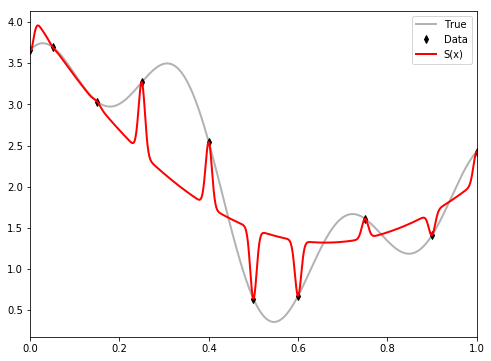

In [4]:
from IPython import display
# using one of the RBF functions already defined:
phi = gauss # tps, gauss, imq, cpc2
#
# use the pairwise distance function from SciPy
from scipy.spatial.distance import cdist
#
# sample locations
x_i = np.array([0.,0.05,0.15,0.25,0.4,0.5,0.6,0.75,0.9,1.0])
f_i = f(x_i)
#
# use the pairwise distance function from SciPy
from scipy.spatial.distance import cdist
dist = cdist(x_i.reshape(-1,1),
             x_i.reshape(-1,1),
             metric='euclidean')
#
# choose a value for $\epilon$ = d in the function phi:
d = 0.01
# PHI / correlation matrix:
PHI = np.array([[phi(r,d) for r in row] for row in dist])
#
# add the polynomial matrix [Pm]
Pm = np.c_[np.ones(x_i.size),x_i,x_i**2]
#
A = np.r_[np.c_[PHI   ,  Pm],
          np.c_[Pm.T  ,  np.zeros((3,3))]]
#
# before solving, check the matrix for possible singularity / ill conditioning
print("Matrix condition number =  %.4f \n"%np.linalg.cond(A))
#
# solve for the weights:
w_i = np.linalg.solve(A,np.r_[f_i.reshape(-1,1),
                                  np.zeros((3,1))]).flatten()
print('Weights : ')
print('\n\tBeta_i     : \n\n\t',w_i[:-3].T)
print('\n\tPolynomial : \n\n\t%+.2f   %+.2f x  %+.2f x^2'%tuple(w_i[-3:]))

#
# RBF approximation
S_i = lambda x,d=d : np.sum(w_i*np.array([phi(r,d) for r in np.abs(x_i-x)] + [1, x, x**2]))

# add the approximation to the previous plot
plt.figure(1,(8,6))
plt.plot(x  ,fx ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_i,f_i,'kd',ms=5,label='Data');
S_i_x = np.array([S_i(x_c) for x_c in x])
plt.plot(x  ,S_i_x ,'r-',lw=2.,label=r'S(x)');
plt.xlim([0,1])
plt.legend();


$ $

$ $

$ $

## Indicators:

Supplementary indicators and uncertainty are further quantities that are very useful in fine-tuning the scalable parameters or developing an adaptive sampling strategy for example. The radius of influence or other scalable parameters may be fine-tuned without access to some  “true” underling function by the use of cross-validation and maximising the likelihood function while uncertainty or prediction error indicators are useful in developing an adaptive sampling strategy. 

### Cross Validation

In the absence of a true known or easily determined function, the RBF approximation may be fine tuned using cross-validation. The full set of data $f_i$ is first split into a “training” and “testing” set or multiple sets if a lot of data is available. Given a set of tunable parameter values, a model is constructed using the training set(s) and the errors calculated between interpolated and true validation values in the testing set(s). When limited data is available, a full “leave-one-out” cross validation is preferred. In this case $N$ different models are constructed where each $i^{th}$ model $S_i(\boldsymbol{x},\boldsymbol{\varepsilon})$ is constructed without one sample value $f_i$ at $\boldsymbol{x}_i$. The objective function given a specific set of scalable parameter values $\varepsilon$ is then 

\begin{equation}
f_\mathrm{obj}(\boldsymbol{\varepsilon}) = \sum_{i=1}^N || S_i(\boldsymbol{x}_i,\boldsymbol{\varepsilon}) - f_i || \tag{10}
\end{equation}

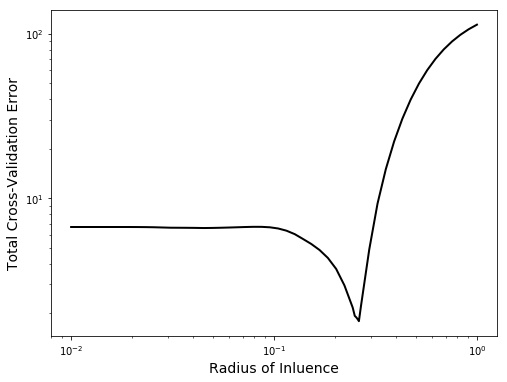

In [5]:
# full leave-one-out cross validation objective function
def f_xve(epsilon, x_i=x_i, f_i=f_i, phi=phi):
    
    epsilon = np.abs(epsilon)
    Fv = 0.
    
    for i in range(x_i.size):
        
        # subset of x_i and f_i
        x_s = np.r_[x_i[:i],x_i[i+1:]]
        f_s = np.r_[f_i[:i],f_i[i+1:]]
        
        dist = cdist(x_s.reshape(-1,1),x_s.reshape(-1,1),metric='euclidean')
        
        PHI = np.array([[phi(r,epsilon) for r in row] for row in dist])

        Pm = np.c_[np.ones(x_s.size),x_s,x_s**2]
        
        A = np.r_[np.c_[PHI,Pm],np.c_[Pm.T , np.zeros((3,3))]]
        
        w_s = np.linalg.solve(A,np.r_[f_s.reshape(-1,1),np.zeros((3,1))])

        # compare estimate at x_i[i] with known value f_i[i]
        row = np.abs(x_s - x_i[i])
        A = np.array([phi(r,epsilon) for r in row] + [1, x_i[i], x_i[i]**2])
        # estimate
        S_i_xi = np.sum(A*w_s.flatten())
        
        # add absolute difference cross validation error:
        Fv+= np.abs(S_i_xi - f_i[i])
        
    return Fv

#
#
phi = gauss
#
#
epsops = np.r_[np.logspace(-2,0), [0.25,0.255,0.26,0.262,0.264]]
epsops.sort()
fops = np.array([f_xve(eps,x_i,f_i,phi) for eps in epsops])

plt.figure(1,(8,6))
plt.plot(epsops  ,fops,'k-',lw=2.);
plt.xscale('log');
plt.yscale('log');
plt.xlabel('Radius of Inluence',fontsize=14);
plt.ylabel('Total Cross-Validation Error',fontsize=14);

In [7]:
f_xve(0.262,x_i,f_i,phi)

1.7900843950846883


### Likelihood Function

The RBF approximation in Eq. (1) is as a result of a set of correlated random variables indexed by the $k$-dimensional input space of $\boldsymbol{x}$. It is therefore possible to inherit useful characteristics from stochastic process models such as the concept of a likelihood function:

\begin{equation}
\frac{1}{ (2\pi)^{N/2} (\sigma^2)^{N/2} |\boldsymbol{\Phi}| }
 \exp \left[ - \frac{ (\boldsymbol{f}-\mathbb{1} \mu )^\textsf{T} \boldsymbol{\Phi}^{-1} (\boldsymbol{f}-\mathbb{1} \mu ) }{ 2\sigma^2}  \right]\tag{11}
\end{equation}

where $\boldsymbol{f}$ is the vector of the observed function values $f_i$ and $\mathbb{1}$ is a vector of ones with the same length as the observations $N$. The scalable parameter dependence is captured via the correlation matrix $\boldsymbol{\Phi}$. For specific values of the scalable parameters, the mean  and variance  values that maximize the likelihood function is

\begin{equation}
\hat{\mu} = \frac{\mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1} \boldsymbol{f}}{\mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1} \mathbb{1}}\tag{12-a}
\end{equation}

and

\begin{equation}
\hat{\sigma}^2 = \frac{(\boldsymbol{f} - \mathbb{1}\hat{\mu})^\textsf{T} \boldsymbol{\Phi}^{-1}(\boldsymbol{f} - \mathbb{1}\hat{\mu}) }{N}.\tag{12-b}
\end{equation}


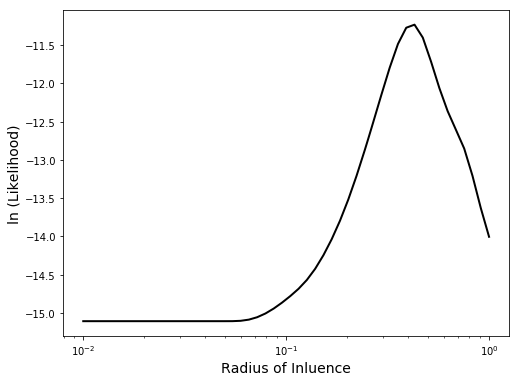

In [8]:
# logarithmic likelihood estimation
def f_lle(epsilon, x_i=x_i, f_i=f_i, phi=phi):
    
    epsilon = np.abs(epsilon)
    
    n = f_i.size
    
    dist = cdist(x_i.reshape(-1,1),x_i.reshape(-1,1),metric='euclidean')
    PHI = np.array([[phi(r,epsilon) for r in row] for row in dist])
    #
    PHIdet = np.linalg.det(PHI)
    PHIinv = np.linalg.inv(PHI)
    
    mu = np.sum(np.matmul(PHIinv,f_i.reshape(-1,1)))/np.sum(np.matmul(PHIinv,np.ones(n)))
    ymmu = f_i.reshape(-1,1)-mu
    s2 = np.matmul(ymmu.T,np.matmul(PHIinv,ymmu))[0,0]/n
    
    ML0 = 1./(np.sqrt(PHIdet)*(2*np.pi*s2)**(n/2))
    ML1 = np.exp(-n/2.)
    
    return np.log(ML0*ML1)
    

#
phi = cpc2#gauss
#
#
epsops = np.r_[np.logspace(-2,0), [0.25,0.255,0.26,0.262,0.264]]
epsops.sort()
fops = np.array([f_lle(eps,x_i,f_i,phi) for eps in epsops])

plt.figure(1,(8,6))
plt.plot(epsops  ,fops,'k-',lw=2.);
plt.xscale('log');
plt.xlabel('Radius of Inluence',fontsize=14);
plt.ylabel('ln (Likelihood)',fontsize=14);

In [9]:
f_obj = lambda d : -f_lle(d,x_i,f_i,phi)
#from scipy.optimize import golden
#golden(f_obj)
f_obj(0.4172)

11.223250826961793


## Estimated prediction error

The error made in interpolating between known sample locations as a specific location of interest  is estimated by first considering $\boldsymbol{\varphi}$  a vector containing the correlation $\phi(\boldsymbol{x}, \boldsymbol{x}_k)$ to all centre locations  $\boldsymbol{x}_k$. Following the DACE approach, the mean squared error of the predicted interpolation value is estimated using

\begin{equation}
\varsigma^2 (\boldsymbol{x}) = \sigma^2 \left[ 1 - \boldsymbol{\varphi}^\textsf{T}\boldsymbol{\Phi}^{-1}\boldsymbol{\varphi}  + \frac{(1 - \mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1}\boldsymbol{\varphi})^2}{\mathbb{1}^\textsf{T}\boldsymbol{\Phi}^{-1}\mathbb{1}
} \right]\tag{13}
\end{equation}

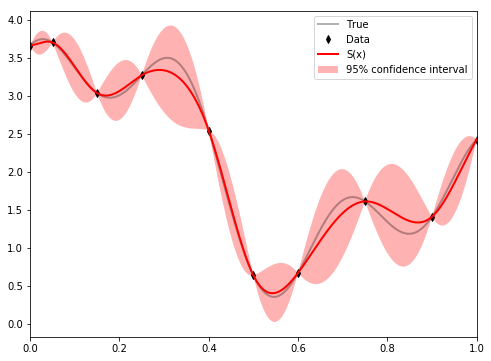

In [6]:
#
# for a specific function and raius of support
phi = cpc2
d = 0.4172

#
# correlation matrix as before
dist   = cdist(x_i.reshape(-1,1),x_i.reshape(-1,1),metric='euclidean')
PHI    = np.array([[phi(r,d) for r in row] for row in dist])
#
# mean and deviation the same as in the likelihood estimation:
PHIdet = np.linalg.det(PHI)
PHIinv = np.linalg.inv(PHI)
n      = f_i.size
mu     = np.sum(np.matmul(PHIinv,f_i.reshape(-1,1)))/np.sum(np.matmul(PHIinv,np.ones(n)))
ymmu   = f_i.reshape(-1,1)-mu
s2     = np.matmul(ymmu.T,np.matmul(PHIinv,ymmu))[0,0]/n
#
# at a point x, the approximated MSE is:
def approx_RMSE(x):
    varphi = np.array([[phi(r,d) for r in np.abs(x_i-x)]]).T
    rmse2  = 1-np.matmul(varphi.T,np.matmul(PHIinv,varphi))
    rmse2 += (1 - np.matmul(np.ones(n),np.matmul(PHIinv,varphi)))**2 / np.sum(PHIinv)
    
    return 0 if rmse2<0 else np.sqrt(s2*rmse2)[0,0]
#
# deviation from mean prediction 
Pm = np.c_[np.ones(x_i.size),x_i,x_i**2]
A = np.r_[np.c_[PHI,Pm],np.c_[Pm.T , np.zeros((3,3))]]
w_i =  np.linalg.solve(A,np.r_[ymmu,np.zeros((3,1))]).flatten()

def approx_MEAN(x):
    return np.sum(np.array([phi(r,d) for r in np.abs(x_i-x)]+[1, x, x**2])*w_i) + mu
    
    
#
S_mean = np.array([approx_MEAN(x_c) for x_c in x])
S_rmse = np.array([approx_RMSE(x_c) for x_c in x])
#
# add the approximation to the previous plot
plt.figure(1,(8,6))
plt.plot(x  ,fx ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_i,f_i,'kd',ms=5,label='Data');
plt.plot(x  ,S_mean ,'r-',lw=2.,label=r'S(x)');
# approximate confidence interval
MS2 = S_mean - 1.9600*S_rmse
PS2 = S_mean + 1.9600*S_rmse
plt.fill(np.concatenate([x  ,  x[::-1]]), 
         np.concatenate([MS2,PS2[::-1]]),
         alpha=.3, fc='r', ec='None', label='95% confidence interval')

plt.xlim([0,1])
plt.legend();

In [11]:
approx_RMSE(0.55)

0.19461668454969802


$ $

$ $

$ $

## Sharp Discontinuities



Matrix condition number =  4578333.9512 



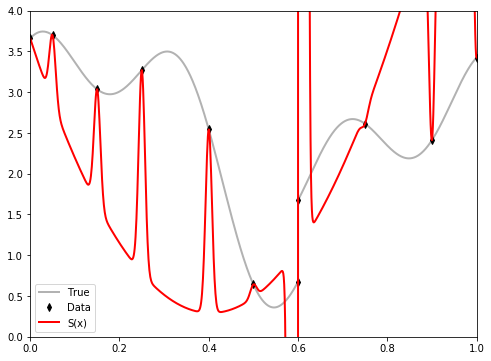

In [89]:

# introduce a discontinuity into testfunction
f2 = lambda x: np.sin(8*x) + 0.66*np.cos(18*x) + 3 - 2*x +(x>0.6)*1
# full resolution 
x2 = np.r_[np.linspace(0,1,1001),0.6000001]
x2.sort(0)
fx2 = f2(x2)
# sample locations
x_i = np.array([0.,0.05,0.15,0.25,0.4,0.5,0.6,0.60001,0.75,0.9,1.0])
f_i = f2(x_i)



# using one of the RBF functions already defined:
phi = gauss # tps, gauss, imq, cpc2
# choose a value for $\epilon$ = d in the function phi:
d = 0.01
# add a regularisation factor:
k = 0.0000#1





#
dist = cdist(x_i.reshape(-1,1),
             x_i.reshape(-1,1),
             metric='euclidean')
#
# PHI / correlation matrix:
PHI = np.array([[phi(r,d) for r in row] for row in dist])
#
# add a regularisation parameters:
PHI += k*np.eye(x_i.size)
#
# add the polynomial matrix [Pm]
Pm = np.c_[np.ones(x_i.size),x_i,x_i**2]
#
A = np.r_[np.c_[PHI   ,  Pm],
          np.c_[Pm.T  ,  np.zeros((3,3))]]
#
# before solving, check the matrix for possible singularity / ill conditioning
print("\n\nMatrix condition number =  %.4f \n"%np.linalg.cond(A))
#
# solve for the weights:
w_i = np.linalg.solve(A,np.r_[f_i.reshape(-1,1),
                                  np.zeros((3,1))]).flatten()
# RBF approximation
S_i = lambda x,d=d : np.sum(w_i*np.array([phi(r,d) for r in np.abs(x_i-x)] + [1, x, x**2]))

# add the approximation to the previous plot
plt.figure(1,(8,6))
plt.plot(x2  ,fx2 ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_i,f_i,'kd',ms=5,label='Data');
S_i_x = np.array([S_i(x_c) for x_c in x])
plt.plot(x  ,S_i_x ,'r-',lw=2.,label=r'S(x)');
plt.xlim([0,1])
plt.ylim([0,4])
plt.legend();


$ $

$ $

$ $

## Regression

If there is a lot of noise in the sample values or a smoother function approximation is desired, it is possible to rather perform a least squares RBF regression instead of solving the interpolation equations in Equation (9). In this case the number of samples locations (now $M$) is likely larger than the number of RBF centres $N$. Written as $\boldsymbol{A}  \times \boldsymbol{b}  = \boldsymbol{f} $ :


\begin{equation}
\begin{array}{c} 
\begin{bmatrix} \Phi_{11} & \cdots & \Phi_{1n} & 1 & x_1 & x_1^2 \\
 \vdots & \ddots & \vdots & \vdots & \vdots & \vdots \\
 \Phi_{m1} & \cdots & \Phi_{mn}  & 1 & x_m & x_m^2 \\
\end{bmatrix}
\begin{Bmatrix} \beta_1 \\ \vdots \\  \beta_n  \\ c_0 \\ c_1 \\c_2 \end{Bmatrix}
& = & \begin{Bmatrix}  f_1 \\ \vdots \\ f_m  \end{Bmatrix}
\end{array}\tag{14}
\end{equation}

For a number of sample points more than the number of chosen RBF centres and number of polynomial coefficients (in the 1D test-function case $M>N+3$), the coefficients are found as the least squares solution ($\boldsymbol{b}^*$) to the overdetermined system of equations in Eq. (14):

\begin{equation}
\boldsymbol{b}^* = (\boldsymbol{A}^\textsf{T} \boldsymbol{A})^{-1} \boldsymbol{A}^\textsf{T}  \boldsymbol{f}
\tag{15}
\end{equation}


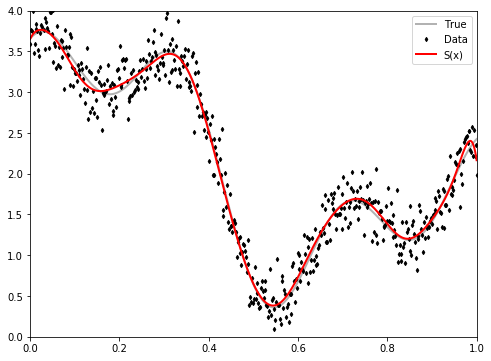

In [90]:
#
phi = gauss
d = 0.2
#
#
npts = 500
x_j = np.linspace(0.,1,npts).reshape(-1,1)
f_j = f(x_j) + np.random.normal(0,0.2,npts).reshape(-1,1)

#
# kernel locations:
x_k = np.linspace(0.,1,20).reshape(-1,1)
# distances bewteen kernels and observations
dist = cdist(x_j.reshape(-1,1),
             x_k.reshape(-1,1),
             metric='euclidean')
#
# PHI / correlation matrix:
PHI = np.array([[phi(r,d) for r in row] for row in dist])
#
# add the polynomial matrix [Pm]
Pm = np.c_[np.ones(x_j.size),x_j,x_j**2]
#
A = np.c_[PHI,Pm]
#
# we'll time it:
from time import time
t0 = time()
# set-up least squares solution:
AtA = np.matmul(A.T,A)
Atf_j = np.matmul(A.T,f_j)
# solve for the weights:
w_LS0 = np.linalg.solve(AtA,Atf_j).flatten()
tLS0 = time()-t0


t0 = time()
# set-up least squares solution:
AtA = np.matmul(A.T,A)
Atf_j = np.matmul(A.T,f_j)
# solve for the weights:
w_LS = np.matmul(np.linalg.inv(AtA),Atf_j).flatten()
tLS = time()-t0
#
# RBF approximation
S_LS = lambda x,d=d : np.sum(w_LS0*np.array([phi(r,d) for r in np.abs(x_k-x)] + [1, x, x**2]))


plt.figure(1,(8,6))
plt.plot(x  ,fx ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_j,f_j,'kd',ms=3,label='Data');
f_LS = np.array([S_LS(x_c) for x_c in x])
plt.plot(x  ,f_LS,'r-',lw=2.,label=r'S(x)');
plt.xlim([0,1])
plt.ylim([0,4])
plt.legend();



$ $

$ $


## Regression by Singular Value Deceomposition and the Pseudo-Inverse






***
Weights using Least Squares [linalg.solve]: 
    >> done in 0.0007 seconds
	Beta_i     : 
	 [ -36131.40177365   95596.49861171 -143327.9421017   101655.03274274
   15087.85245681]
	Polynomial : 
	+11314.19   +32867.03 x  -33781.87 x^2

***
Weights using Least Squares [linalg.inv]: 
    >> done in 0.0006 seconds
	Beta_i     : 
	 [  144036.796875  -650931.75      1351874.75     -1791130.5
  1674285.      ]
	Polynomial : 
	+11314.17   +32866.92 x  -33781.77 x^2

***
Weights using SVD and constructed pseudo inverse: 
    >> done in 0.0133 seconds
	Beta_i     : 
	 [  1210615.99784053  -5325694.25081022  13785247.91307465
 -25082043.95999014  34883609.3801026 ]
	Polynomial : 
	-156158.69   -406055.02 x  +398500.37 x^2

***
Weights using [numpy.linalg.pinv]: 
    >> done in 0.0023 seconds
	Beta_i     : 

	 [  1210615.99784053  -5325694.25081032  13785247.91307508
 -25082043.95999114  34883609.38010505]
	Polynomial : 

	-156158.69   -406055.02 x  +398500.37 x^2

***
Weights using inv[sqrt

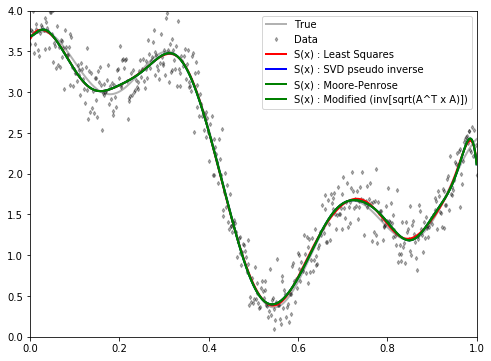

In [92]:

print('\n***\nWeights using Least Squares [linalg.solve]: ')
print('    >> done in %.4f seconds'%tLS0)
print('\tBeta_i     : \n\t',w_LS0[:5].T)
print('\tPolynomial : \n\t%+.2f   %+.2f x  %+.2f x^2'%tuple(w_LS0[-3:]))



print('\n***\nWeights using Least Squares [linalg.inv]: ')
print('    >> done in %.4f seconds'%tLS)
print('\tBeta_i     : \n\t',w_LS[:5].T)
print('\tPolynomial : \n\t%+.2f   %+.2f x  %+.2f x^2'%tuple(w_LS[-3:]))


# singular value decomposition and constructing the pseudo inverse:

t0 = time()

u, s, v = np.linalg.svd(A, full_matrices=True)

Dinv = np.c_[np.eye(s.size)/s,np.zeros((s.size,u.shape[0]-s.size))]

AinvSVD = np.matmul(v.T,np.matmul(Dinv,u.T))

w_SVD = np.matmul(AinvSVD,f_j).flatten()

tSVD = time()-t0

S_SVD = lambda x,d=d : np.sum(w_SVD*np.array([phi(r,d) for r in np.abs(x_k-x)] + [1, x, x**2]))
f_SVD = np.array([S_SVD(x_c) for x_c in x])

print('\n***\nWeights using SVD and constructed pseudo inverse: ')
print('    >> done in %.4f seconds'%tSVD)
print('\tBeta_i     : \n\t',w_SVD[:5].T)
print('\tPolynomial : \n\t%+.2f   %+.2f x  %+.2f x^2'%tuple(w_SVD[-3:]))

# 
# LUCKILY: numpy has a funtion for the (Moore-Penrose) pseudo-inverse of a rectangular matrix

from numpy.linalg import pinv

t0 = time()

Apinv = pinv(A)
w_pinv = np.matmul(Apinv,f_j).flatten()

tpinv = time()-t0

S_pinv = lambda x,d=d : np.sum(w_pinv*np.array([phi(r,d) for r in np.abs(x_k-x)] + [1, x, x**2]))
f_pinv = np.array([S_pinv(x_c) for x_c in x])

print('\n***\nWeights using [numpy.linalg.pinv]: ')
print('    >> done in %.4f seconds'%tpinv)
print('\tBeta_i     : \n\n\t',w_pinv[:5].T)
print('\tPolynomial : \n\n\t%+.2f   %+.2f x  %+.2f x^2'%tuple(w_pinv[-3:]))

#
#
# also - modify A x = b using the inv[sqrt(A'A)]
t0 = time()
# set-up least squares solution:
AtA = np.matmul(A.T,A)
#
u, s, v = np.linalg.svd(AtA, full_matrices=True)
#
Dsqrt = np.c_[np.eye(s.size)/np.sqrt(s)]
#
AmodInv = np.matmul(v.T,np.matmul(Dsqrt,u.T))
Amod = np.matmul(AmodInv,AtA)

f_mod = np.matmul(AmodInv,np.matmul(A.T,f_j))


# solve for the weights:
w_mod = np.matmul(AmodInv,f_mod).flatten()
tMod = time()-t0
#
# RBF approximation
S_mod = lambda x,d=d : np.sum(w_mod*np.array([phi(r,d) for r in np.abs(x_k-x)] + [1, x, x**2]))
f_mod = np.array([S_mod(x_c) for x_c in x])

print('\n***\nWeights using inv[sqrt(A.t x A)]: ')
print('    >> done in %.4f seconds'%tMod)
print('\tBeta_i     : \n\n\t',w_mod[:5].T)
print('\tPolynomial : \n\n\t%+.2f   %+.2f x  %+.2f x^2'%tuple(w_mod[-3:]))

#
#
# plot the different options:

plt.figure(1,(8,6))
plt.plot(x  ,fx ,'k-',lw=2.,alpha=0.3,label='True');
plt.plot(x_j,f_j,'kd',alpha=0.3,ms=3,label='Data');

plt.plot(x  ,f_LS,'r-',lw=2.,label=r'S(x) : Least Squares');
plt.plot(x  ,f_SVD,'b-',lw=2.,label=r'S(x) : SVD pseudo inverse');
plt.plot(x  ,f_pinv,'g-',lw=2.,label=r'S(x) : Moore-Penrose');
plt.plot(x  ,f_pinv,'g-',lw=2.,label=r'S(x) : Modified (inv[sqrt(A^T x A)])');
plt.xlim([0,1])
plt.ylim([0,4])
plt.legend();




